<a href="https://colab.research.google.com/github/JulianoMata/projeto_final_mod05/blob/main/Projeto_Mod05_Grupo08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="cian"> Descrição do Projeto:</font>

## <font color="green">I - Introdução</font>

* Você e sua equipe foram escalados pela Procuradoria Geral da República
para investigarem os gastos dos parlamentares brasileiros nos anos de
2019, 2020 e 2021. Para isso vocês devem utilizar o conjunto de dados
sobre a `Cota para o Exercício da Atividade Parlamentar`, a `CEAP`. Em
resumo, a `CEAP` pode ser definida como: “cota única mensal destinada a
custear os gastos dos deputados exclusivamente vinculados ao exercício
da atividade parlamentar.” Essa ajuda de custo para os nossos
digníssimos representantes podem cobrir despesas com alimentação,
transporte, hospedagem, consultoria técnica, combustíveis e entre outras.

* A `CEAP` é regida por uma série de regras que podem ser consultadas [aqui](https://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-norma-cd-mesa.html).
Há algumas iniciativas, como o [Serenata de Amor](https://serenata.ai/), que visam acompanhar os gastos realizados pelos nossos políticos e podem ser utilizadas para auxiliar na geração de insights.

* A fonte dos dados podem ser conferidas [aqui](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar), assim como dicionário de
dados podem ser visualizados [aqui](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml). Contudo, para facilitar o trabalho de vocês, os dados já estão disponibilizados [aqui](https://drive.google.com/drive/u/7/folders/1H_uQc8UTzA1is3jjZjmrFRIabiOUHoIi), nos arquivos: Ano-2019.csv, Ano-2020.csv e Ano-2021.

##<font color="green">II - As perguntas a serem respondidas são:</font>

1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?
2. Qual a média de gastos por parlamentar?
3. Quais foram os parlamentares que mais e que menos consumiram
recursos?
4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?
5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?
6. Qual a média de gastos por estado?
7. Qual é o valor total de gastos por estado?
8. Quais estados têm maior número de representantes?
9. Há alguma correlação entre a quantidade de parlamentares por
estado e o valor total dos gastos?
10. Qual a média de gastos por partido?
11. Quais são os partidos que mais e que menos consumiram a
cota parlamentar?
12. Há alguma correlação entre a quantidade de parlamentares
por partido e o valor total dos gastos?

## <font color="green">III - O projeto deverá </font><font color='red'>obrigatoriamente:</font>


* Utilizar Jupyter Notebook ou Colab;
* Realizar a limpeza dos dados;
* Realizar análise exploratório;
* Responder cada uma das perguntas com a visualização mais adequada;
* O notebook utilizado na análise deve estar organizado, com descrições
do passo a passo da análise em markdown, apresentação dos resultados e
insights gerados;
* Levantar mais duas perguntas e respondê-las com a visualização mais
adequada.
Apresentação:
* Todos os integrantes do grupo deverão apresentar
* Apresente a análise realizada e organizada no Jupyter Notebook ou
Colab
* Utilize slides de apoio para sua apresentação
* Seu grupo terá 15 minutos (no máximo) para apresentar

## <font color="green">IV - Dicionário </font>


In [1]:
#Bibliotecas úteis
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dicionario = pd.read_csv("/content/dicionario_utf-8.csv", sep=';')
df_dicionario = pd.DataFrame(dicionario)
df_dicionario.style.set_properties(**{"text-align": "left"})

,Elemento de Dado,Nome do Dado,Definição do Dado
0,txNomeParlamentar,Nome Parlamentar,"Nome adotado pelo Parlamentar ao tomar posse do seu mandato. Compõe-se de dois elementos: um prenome e o nome; dois nomes; ou dois prenomes, salvo, a juízo do Presidente da Casa legislativa, que poderá alterar essa regra para que não ocorram confusões."
1,ideCadastro,Identificador Único do Parlamentar,Número que identifica unicamente um deputado federal na CD.
2,nuCarteiraParlamentar,Número da Carteira Parlamentar,Documento usado para identificar um deputado federal na CD. Pode alterar a cada Legislatura nova.
3,nuLegislatura,Número da Legislatura,"Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais. No contexto da cota CEAP, representa o ano base de início da legislatura e é utilizado para compor a Carteira Parlamentar, pois esta poderá ser alterada à medida que se muda de Legislatura."
4,sgUF,Sigla da UF,"No contexto da cota CEAP, representa a unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem."
5,sgPartido,Sigla do Partido,"O seu conteúdo representa a sigla de um partido. Definição de partido: é uma organização formada por pessoas com interesse ou ideologia comuns, que se associam com o fim de assumir o poder para implantar um programa de governo. Tem personalidade jurídica de direito privado e goza de autonomia e liberdade no que diz respeito à criação, organização e funcionamento, observados os princípios e preceitos constitucionais."
6,codLegislatura,Código da Legislatura,"Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais. No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura, que um número ordinal sequencial, alterado de um em um, a cada início de uma nova Legislatura (por exemplo, a Legislatura que iniciou em 2011 é a 54ª Legislatura)."
7,numSubCota,Número da Subcota,"No contexto da Cota CEAP, o conteúdo deste dado representa o código do Tipo de Despesa referente à despesa realizada pelo deputado e comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado."
8,txtDescricao,Descrição da Subcota,O seu conteúdo é a descrição do Tipo de Despesa relativo à despesa em questão.
9,numEspecificacaoSubCota,Número da Especificação da Subcota,"No contexto da Cota CEAP, há despesas cujo Tipo de Despesa necessita ter uma especificação mais detalhada (por exemplo, “Combustível”). O conteúdo deste dado representa o código desta especificação mais detalhada."


# <font color="cian">DataFrame 2019</font>

In [2]:
dados_2019 = pd.read_csv("/content/Ano_2019.csv", sep=';')
df_2019 = pd.DataFrame(dados_2019)

In [ ]:
df_2019.head()

In [4]:
df_2019.shape

(288992, 31)

In [ ]:
display(df_2019.dtypes)

In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288992 entries, 0 to 288991
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          288992 non-null  object 
 1   cpf                        287989 non-null  float64
 2   ideCadastro                288087 non-null  float64
 3   nuCarteiraParlamentar      288087 non-null  float64
 4   nuLegislatura              288992 non-null  int64  
 5   sgUF                       288087 non-null  object 
 6   sgPartido                  288087 non-null  object 
 7   codLegislatura             288992 non-null  int64  
 8   numSubCota                 288992 non-null  int64  
 9   txtDescricao               288992 non-null  object 
 10  numEspecificacaoSubCota    288992 non-null  int64  
 11  txtDescricaoEspecificacao  64765 non-null   object 
 12  txtFornecedor              288977 non-null  object 
 13  txtCNPJCPF                 28

In [ ]:
# Conferir a existência de dados
(df_2019.isnull().sum() / df_2019.shape[0]).sort_values(ascending=False)

In [ ]:
df_2019.columns

In [158]:
df_2019.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [ ]:
df_2019.index

In [ ]:
df_2019.describe()

In [ ]:
df_2019.isnull()

## <font color="green"> Histograma 2019

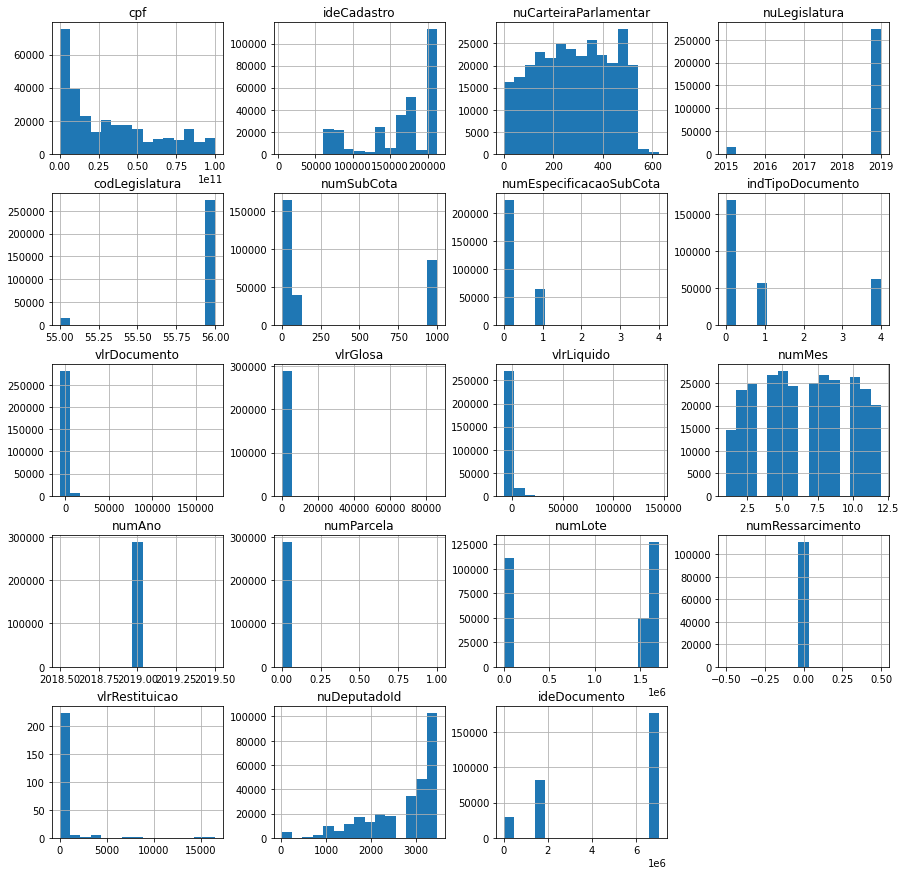

In [12]:
df_2019.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian"> DataFrame 2020</font>

In [13]:
dados_2020 = pd.read_csv("/content/Ano_2020.csv", sep=';')
df_2020 = pd.DataFrame(dados_2020)

In [ ]:
df_2020.head()

In [15]:
df_2020.shape

(160903, 31)

In [ ]:
display(df_2020.dtypes)

In [ ]:
df_2020.info()

In [ ]:
# Conferir a existência de dados
(df_2020.isnull().sum() / df_2020.shape[0]).sort_values(ascending=False)

In [ ]:
df_2020.columns

In [160]:
df_2020.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [20]:
df_2020.index

RangeIndex(start=0, stop=160903, step=1)

In [ ]:
df_2020.describe()

In [ ]:
df_2020.isnull()

## <font color="green"> Histograma 2020

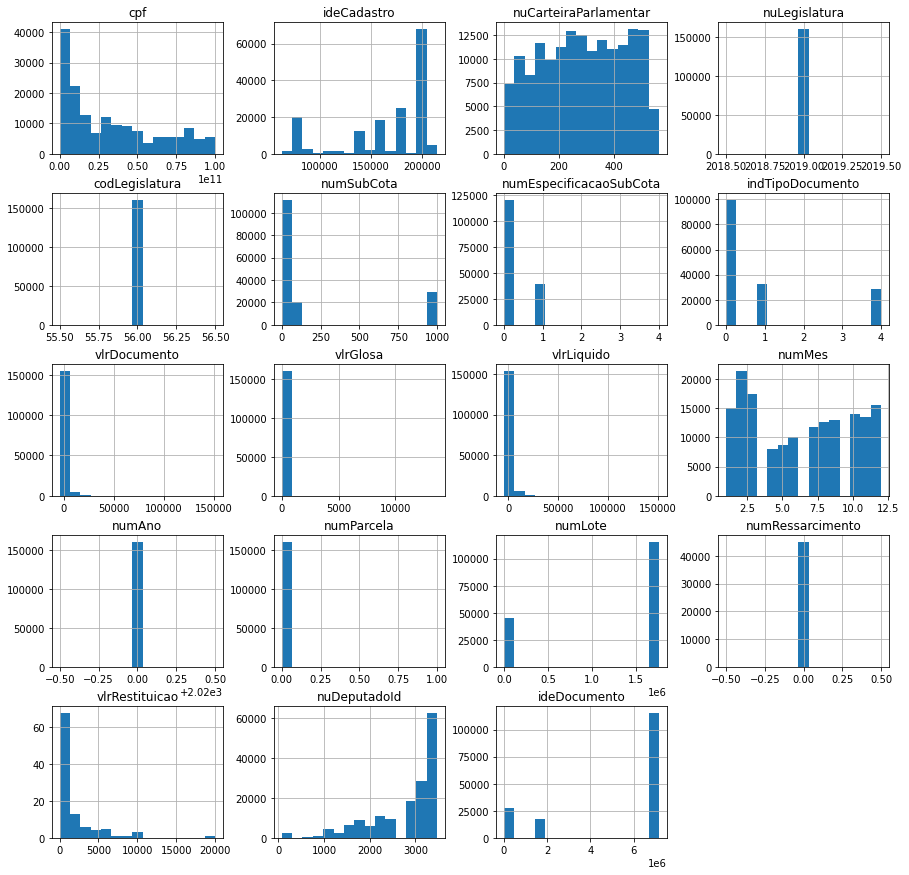

In [23]:
df_2020.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian"> DataFrame 2021</font>

In [24]:
dados_2021 = pd.read_csv("/content/Ano_2021.csv", sep=';')
df_2021 = pd.DataFrame(dados_2021)

In [ ]:
df_2021.head()

In [26]:
df_2021.shape

(105605, 31)

In [ ]:
display(df_2021.dtypes)

In [ ]:
df_2021.info()

In [ ]:
# Conferir a existência de dados
(df_2021.isnull().sum() / df_2021.shape[0]).sort_values(ascending=False)

In [ ]:
df_2021.columns

In [162]:
df_2021.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [ ]:
df_2021.index

In [ ]:
df_2021.describe()

In [ ]:
df_2021.isnull()

## <font color="green"> Histograma 2021

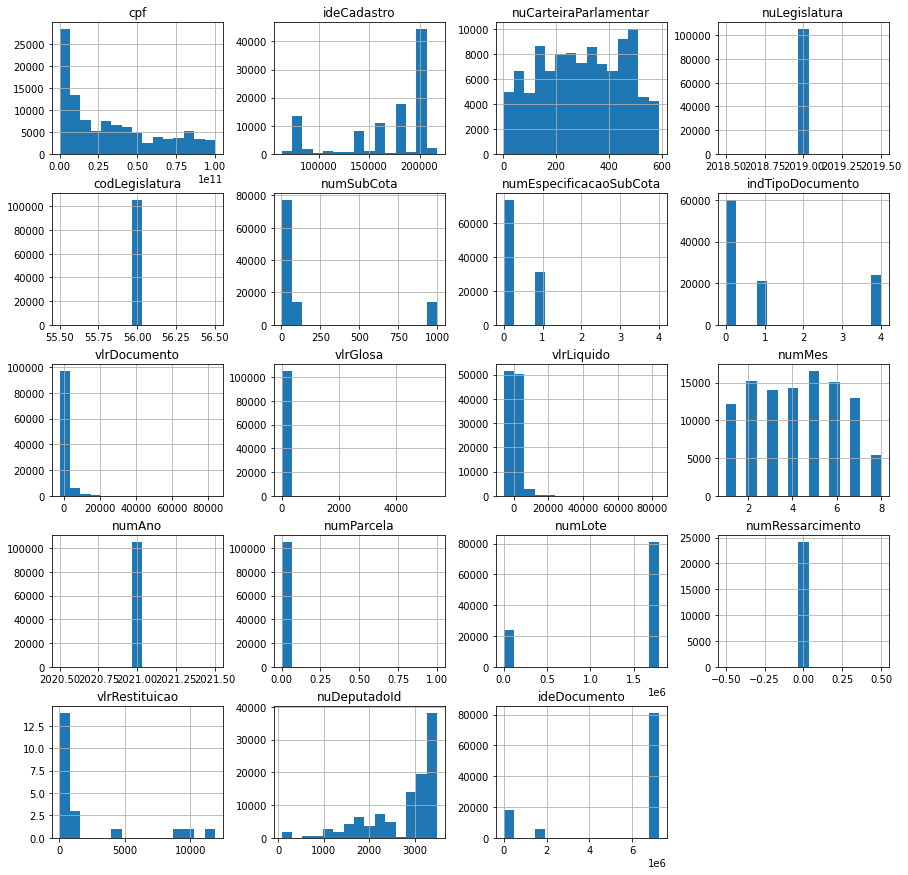

In [34]:
df_2021.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian">DataFrame Concatenado</font>

In [35]:
pd.set_option("display.max_rows", 150, "display.max_columns", 35)

In [36]:
df_unico = pd.concat([dados_2019, dados_2020, dados_2021], ignore_index=True)

In [ ]:
df_unico.head()

In [38]:
df_unico.shape

(555500, 31)

In [ ]:
df_unico.info()

In [ ]:
display(df_unico.dtypes)

In [ ]:
df_unico.duplicated().values.sum()

In [ ]:
# Conferir a existência de dados
(df_unico.isnull().sum() / df_unico.shape[0]).sort_values(ascending=False)

In [ ]:
df_unico.columns

In [44]:
df_unico.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [45]:
#df_unico['data_emissao'] = pd.to_datetime(df_unico['data_emissao'], errors='coerce', dayfirst=True)
df_unico['data_emissao'] = pd.to_datetime(df_unico['data_emissao'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

In [ ]:
df_unico.columns

In [ ]:
round(df_unico.isnull().mean()*100, 2)

In [ ]:
round(df_unico.describe())

In [ ]:
round(df_unico.describe().T, 2)

In [ ]:
df_unico.isnull()

## <font color="green"> Histograma DataFrame Único

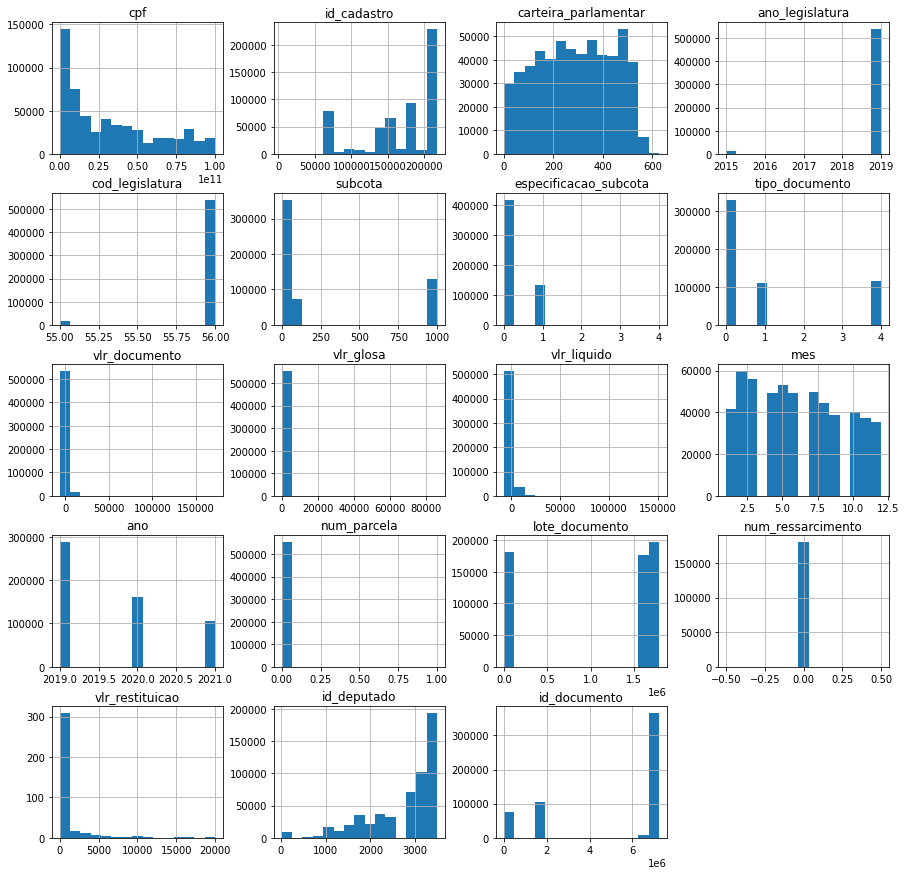

In [51]:
df_unico.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color = "cian">Exercícios</font>

### <font color='green'>1. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?</font>

In [164]:
df_2019["vlr_liquido"].mean()

712.3467265525929

In [165]:
df_2020["vlr_liquido"].mean()

948.5052734256051

In [166]:
df_2021["vlr_liquido"].mean()

859.5978206524014

In [ ]:
df_unico.groupby(["vlr_documento", "vlr_liquido"])["ano", "mes" ].sum().sort_values(by = "ano")

### <font color='green'>2. Qual a média de gastos por parlamentar?</font>


In [ ]:
df_unico.groupby(["nome_parlamentar", "id_cadastro"])["vlr_liquido", "vlr_documento", "vlr_glosa"].mean().sort_values(by = "vlr_liquido")

### <font color='green'>3. Quais foram os parlamentares que mais e que menos consumiram recursos?</font>


In [ ]:
df_unico.groupby(["nome_parlamentar", "id_cadastro"])["vlr_liquido", "vlr_restituicao"].sum().sort_values(by = "vlr_liquido")

### <font color='green'>4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?</font>


In [ ]:
df_unico.groupby(["descricao"])["vlr_documento", "vlr_liquido"].max().sort_values(by = "vlr_liquido")

In [ ]:
pd.DataFrame(df_unico.groupby(["descricao_especificacao"])["vlr_documento"].max())

In [ ]:
df_unico.groupby(["descricao_especificacao"])["vlr_documento"].max()

### <font color='green'>5. Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?


In [ ]:
df_unico.groupby(["trecho"])["vlr_documento", "vlr_liquido"].max().sort_values(by = "vlr_liquido")

### <font color='green'>6. Qual a média de gastos por estado?</font>


In [ ]:
df_media_estado = df_unico.groupby(["UF"])["vlr_liquido", "vlr_documento"].mean().round(2)
df_media_estado

### <font color='green'>7. Qual é o valor total de gastos por estado?</font>


In [ ]:
pd.DataFrame(df_unico.groupby(["UF"])["vlr_liquido"].sum().sort_values())


In [ ]:
df_valor_total_estado = df_unico.groupby(["UF"])["vlr_liquido"].sum().sort_values()
df_valor_total_estado

### <font color='green'>8. Quais estados têm maior número de representantes?</font>


In [ ]:
pd.DataFrame(df_unico.groupby(["UF"])["id_deputado"].max().sort_values())


In [ ]:
df_representantes = df_unico.groupby(["UF"])["id_deputado"].max().sort_values()
df_representantes

### <font color='green'>9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?</font>


### <font color='green'>10. Qual a média de gastos por partido?</font>


In [ ]:
df_unico.groupby(["partido"])["vlr_liquido", "vlr_documento"].mean().sort_values(by = "vlr_documento").round(2)

### <font color='green'>11. Quais são os partidos que mais e que menos consumiram a cota parlamentar?</font>


In [ ]:
df_unico.groupby(["partido"])["vlr_restituicao", "vlr_liquido", "vlr_documento"].sum().sort_values(by = "vlr_liquido")

### <font color='green'>12. Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?</font>